In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
cwd = os.getcwd()
import sys
sys.path.append(cwd)
import torch
import pytorch_lightning as pl
import pickle as pkl
from modules.experiments.experiment import Experiment
from modules.experiments.timer import Timer
from experiments.experiment_config import (
    ALL_LIGHTNING_MODELS,
    get_processed_synthetic_cabin_ir_1m_loaders,
    synthetic_cabin_ir_1m_preprocess_loaders
)
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from modules.lifter_2d_3d.model.linear_model.network.linear_model import BaselineModel
from modules.lifter_2d_3d.model.repnet.lit_repnet import LitRepNet

pl.seed_everything(1234)
constructed_loader = get_processed_synthetic_cabin_ir_1m_loaders('Dashboard_Front_OMS_01')

model_checkpoint = ModelCheckpoint(monitor='mpjpe',mode='min', save_top_k=1)
early_stopping = EarlyStopping(monitor="mpjpe", mode="min", patience=5)

# ------------
# model
# ------------
lifter_2D_3D = BaselineModel(exclude_ankle=True, exclude_knee=True)
lit_model = LitRepNet(lifter_2D_3D=lifter_2D_3D)
# ------------
# training
# ------------
# saved_model_path = './saved_lifter_2d_3d_model/synthetic_cabin_bw/A_Pillar_Codriver/prediction/repnet_linear_model/'
saved_model_path = './saved_lifter_2d_3d_model/rq3/repnet'
if not os.path.exists(saved_model_path):
    os.makedirs(saved_model_path)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device', device)
# device = 'cpu'
trainer = pl.Trainer(
    # max_steps=10,
    max_epochs=100,
    callbacks=[model_checkpoint, early_stopping],
    accelerator=device,
    check_val_every_n_epoch=5,
    default_root_dir=saved_model_path,
    reload_dataloaders_every_n_epochs=1,
    # gradient_clip_val=1.0
)
train_loader = constructed_loader['train_loader']
val_loader = constructed_loader['val_loader']
test_loader = constructed_loader['test_loader']

trainer.fit(lit_model, train_loader, val_loader)

Global seed set to 1234
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


device cuda


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type               | Params
-----------------------------------------------------
0 | lifter_2D_3D  | BaselineModel      | 4.3 M 
1 | camera_net    | CameraNet          | 4.0 M 
2 | generator     | RepNet             | 8.3 M 
3 | discriminator | DiscriminatorModel | 89.2 K
-----------------------------------------------------
8.4 M     Trainable params
0         Non-trainable params
8.4 M     Total params
33.650    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/conda/lib/python3.10/shutil.py", line 731, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/opt/conda/lib/python3.10/shutil.py", line 729, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-rmhsuxsb'


check #0
val MPJPE from: 128 samples : 2413.00106048584
val P-MPJPE from: 128 samples : 2257.245683200801


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 13670 batches:
d_loss = 5.044032587159504
g_loss = -0.4191411657934904
c_loss = 0.6584612437527307
pose_2d_loss = 3.9917243368758113
total_g_loss = 4.231044408171312
val MPJPE from: 87500 samples : 227.2346168756485
val P-MPJPE from: 87500 samples : 133.49127663527094


Validation: 0it [00:00, ?it/s]

check #2
training loss from 13670 batches:
d_loss = 0.6420281015582119
g_loss = -0.7214143260964618
c_loss = 0.04881280839011269
pose_2d_loss = 0.10783006268462825
total_g_loss = -0.5647714550303733
val MPJPE from: 87500 samples : 200.7090449333191
val P-MPJPE from: 87500 samples : 135.06158229546094


Validation: 0it [00:00, ?it/s]

check #3
training loss from 13670 batches:
d_loss = 0.007303348245346069
g_loss = -0.4719710609602422
c_loss = 0.018152115513770224
pose_2d_loss = 0.08982101350848311
total_g_loss = -0.36399793191359875
val MPJPE from: 87500 samples : 196.59294188022614
val P-MPJPE from: 87500 samples : 129.4129058131775


Validation: 0it [00:00, ?it/s]

check #4
training loss from 13670 batches:
d_loss = 0.001190756380866042
g_loss = -0.48569783556173557
c_loss = 0.011170319981713613
pose_2d_loss = 0.09173950925687412
total_g_loss = -0.38278800612526737
val MPJPE from: 87500 samples : 196.8201845884323
val P-MPJPE from: 87500 samples : 128.80099951565893


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/conda/lib/python3.10/shutil.py", line 731, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/opt/conda/lib/python3.10/shutil.py", line 729, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-n_ek0yyh'
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 133, in _remove_

Validation: 0it [00:00, ?it/s]

check #5
training loss from 13670 batches:
d_loss = -0.000409016987536155
g_loss = -0.48675646673351114
c_loss = 0.00749351105200714
pose_2d_loss = 0.09182817105315598
total_g_loss = -0.3874347845022924
val MPJPE from: 87500 samples : 195.06749510765076
val P-MPJPE from: 87500 samples : 128.4157190872261


Validation: 0it [00:00, ?it/s]

check #6
training loss from 13670 batches:
d_loss = -0.0008546414754854893
g_loss = -0.4888415956593118
c_loss = 0.006184411833036198
pose_2d_loss = 0.09180626228789648
total_g_loss = -0.39085092144284533
val MPJPE from: 87500 samples : 194.9308067560196
val P-MPJPE from: 87500 samples : 129.64816513478203
current learning rate: [9.5e-05] [9.5e-05]
current learning rate: [9.025e-05] [9.025e-05]
current learning rate: [8.573749999999999e-05] [8.573749999999999e-05]


Validation: 0it [00:00, ?it/s]

check #7
training loss from 13670 batches:
d_loss = -0.0008146582574069387
g_loss = -0.49043940655402046
c_loss = 0.005437241635137478
pose_2d_loss = 0.09162199071716809
total_g_loss = -0.3933801740625956
val MPJPE from: 87500 samples : 198.44560325145721
val P-MPJPE from: 87500 samples : 131.54156198045507
current learning rate: [8.145062499999998e-05] [8.145062499999998e-05]
current learning rate: [7.737809374999998e-05] [7.737809374999998e-05]
current learning rate: [7.350918906249998e-05] [7.350918906249998e-05]
current learning rate: [6.983372960937497e-05] [6.983372960937497e-05]
current learning rate: [6.634204312890622e-05] [6.634204312890622e-05]


Validation: 0it [00:00, ?it/s]

check #8
training loss from 13670 batches:
d_loss = -0.0003992874611654689
g_loss = -0.4945318320609395
c_loss = 0.004203680426344935
pose_2d_loss = 0.0915087090228802
total_g_loss = -0.39881944249996587
val MPJPE from: 87500 samples : 192.9648369550705
val P-MPJPE from: 87500 samples : 126.77848017868992
current learning rate: [6.30249409724609e-05] [6.30249409724609e-05]
current learning rate: [5.987369392383786e-05] [5.987369392383786e-05]
current learning rate: [5.688000922764596e-05] [5.688000922764596e-05]
current learning rate: [5.4036008766263664e-05] [5.4036008766263664e-05]
current learning rate: [5.133420832795048e-05] [5.133420832795048e-05]


Validation: 0it [00:00, ?it/s]

check #9
training loss from 13670 batches:
d_loss = -0.0006098947132138458
g_loss = -0.4955604043661807
c_loss = 0.0033439314548875223
pose_2d_loss = 0.09136534850082435
total_g_loss = -0.4008511243332191
val MPJPE from: 87500 samples : 196.88519835472107
val P-MPJPE from: 87500 samples : 130.36380371745008
current learning rate: [4.876749791155295e-05] [4.876749791155295e-05]
current learning rate: [4.6329123015975305e-05] [4.6329123015975305e-05]
current learning rate: [4.4012666865176535e-05] [4.4012666865176535e-05]
current learning rate: [4.181203352191771e-05] [4.181203352191771e-05]
current learning rate: [3.972143184582182e-05] [3.972143184582182e-05]


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/conda/lib/python3.10/shutil.py", line 731, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/opt/conda/lib/python3.10/shutil.py", line 729, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ctu55ccs'


Validation: 0it [00:00, ?it/s]

check #10
training loss from 13670 batches:
d_loss = -0.0008325281192610912
g_loss = -0.4952145295829431
c_loss = 0.002691884164769276
pose_2d_loss = 0.09134556787482298
total_g_loss = -0.4011770775720161
val MPJPE from: 87500 samples : 196.40575349330902
val P-MPJPE from: 87500 samples : 130.1039621942913
current learning rate: [3.7735360253530726e-05] [3.7735360253530726e-05]
current learning rate: [3.584859224085419e-05] [3.584859224085419e-05]
current learning rate: [3.405616262881148e-05] [3.405616262881148e-05]
current learning rate: [3.2353354497370904e-05] [3.2353354497370904e-05]
current learning rate: [3.0735686772502355e-05] [3.0735686772502355e-05]


Validation: 0it [00:00, ?it/s]

check #11
training loss from 13670 batches:
d_loss = -0.0009618869897498645
g_loss = -0.49540622565723635
c_loss = 0.002227280059501995
pose_2d_loss = 0.09130921804543037
total_g_loss = -0.4018697274607642
val MPJPE from: 87500 samples : 192.58412718772888
val P-MPJPE from: 87500 samples : 128.10666769038895
current learning rate: [2.9198902433877236e-05] [2.9198902433877236e-05]
current learning rate: [2.7738957312183373e-05] [2.7738957312183373e-05]
current learning rate: [2.6352009446574204e-05] [2.6352009446574204e-05]
current learning rate: [2.5034408974245492e-05] [2.5034408974245492e-05]


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/conda/lib/python3.10/shutil.py", line 731, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/opt/conda/lib/python3.10/shutil.py", line 729, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-9lf9qur_'


current learning rate: [2.3782688525533216e-05] [2.3782688525533216e-05]


Validation: 0it [00:00, ?it/s]

check #12
training loss from 13670 batches:
d_loss = -0.001005169065679739
g_loss = -0.4955796752258558
c_loss = 0.0018733604556840696
pose_2d_loss = 0.09123291981671532
total_g_loss = -0.40247339497278795
val MPJPE from: 87500 samples : 195.948526263237
val P-MPJPE from: 87500 samples : 130.69512811454038
current learning rate: [2.2593554099256555e-05] [2.2593554099256555e-05]
current learning rate: [2.1463876394293726e-05] [2.1463876394293726e-05]
current learning rate: [2.039068257457904e-05] [2.039068257457904e-05]
current learning rate: [1.9371148445850086e-05] [1.9371148445850086e-05]
current learning rate: [1.840259102355758e-05] [1.840259102355758e-05]


Validation: 0it [00:00, ?it/s]

check #13
training loss from 13670 batches:
d_loss = -0.001008163365166605
g_loss = -0.49619046495879926
c_loss = 0.0016025203637785232
pose_2d_loss = 0.09120758272756516
total_g_loss = -0.4033803619384417
val MPJPE from: 87500 samples : 193.46006214618683
val P-MPJPE from: 87500 samples : 128.34344283167385
current learning rate: [1.74824614723797e-05] [1.74824614723797e-05]
current learning rate: [1.6608338398760715e-05] [1.6608338398760715e-05]
current learning rate: [1.5777921478822678e-05] [1.5777921478822678e-05]
current learning rate: [1.4989025404881544e-05] [1.4989025404881544e-05]
current learning rate: [1.4239574134637466e-05] [1.4239574134637466e-05]


Validation: 0it [00:00, ?it/s]

check #14
training loss from 13670 batches:
d_loss = -0.000933751912327516
g_loss = -0.4956125922964364
c_loss = 0.0013839171937540455
pose_2d_loss = 0.09121093587090084
total_g_loss = -0.4030177391656751
val MPJPE from: 87500 samples : 195.6411898136139
val P-MPJPE from: 87500 samples : 130.16975930355224
current learning rate: [1.3527595427905592e-05] [1.3527595427905592e-05]
current learning rate: [1.2851215656510312e-05] [1.2851215656510312e-05]
current learning rate: [1.2208654873684796e-05] [1.2208654873684796e-05]
current learning rate: [1.1598222130000555e-05] [1.1598222130000555e-05]
current learning rate: [1.1018311023500527e-05] [1.1018311023500527e-05]


Validation: 0it [00:00, ?it/s]

check #15
training loss from 13670 batches:
d_loss = -0.0009439477674170325
g_loss = -0.49489506804428574
c_loss = 0.0012250489583402469
pose_2d_loss = 0.09117575456996686
total_g_loss = -0.4024942644425527
val MPJPE from: 87500 samples : 195.9853321313858
val P-MPJPE from: 87500 samples : 130.07357336595723
current learning rate: [1.04673954723255e-05] [1.04673954723255e-05]
current learning rate: [9.944025698709225e-06] [9.944025698709225e-06]
current learning rate: [9.446824413773763e-06] [9.446824413773763e-06]
current learning rate: [8.974483193085074e-06] [8.974483193085074e-06]


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/conda/lib/python3.10/shutil.py", line 731, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/opt/conda/lib/python3.10/shutil.py", line 729, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-a839ya50'


current learning rate: [8.52575903343082e-06] [8.52575903343082e-06]


Validation: 0it [00:00, ?it/s]

check #16
training loss from 13670 batches:
d_loss = -0.0008094376415482143
g_loss = -0.49347442816929304
c_loss = 0.0011024363921151646
pose_2d_loss = 0.0911767892381442
total_g_loss = -0.4011952025574668
val MPJPE from: 87500 samples : 196.11550867557526
val P-MPJPE from: 87500 samples : 130.08964627664503
current learning rate: [8.09947108175928e-06] [8.09947108175928e-06]


In [12]:
from modules.utils.visualization import generate_connection_line, get_sample_from_loader, visualize_pose
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sample = get_sample_from_loader(val_loader)

In [13]:
for item in val_loader.dataset.samples:
    if item['id'] == sample[0]:
        print(item)
        break

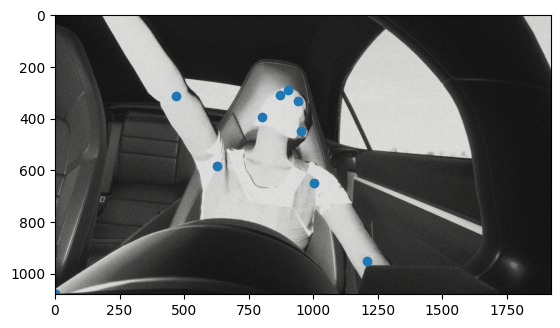

In [25]:
img = plt.imread(f'/root/synthetic_cabin_1m/syntheticcabin_1mil/SyntheticCabin_1m/images/{item["filenames"]}')
fig, ax = plt.subplots()
ax.imshow(img)

ax.scatter(item['pose_2d'][:,0] * item['scale_factor'][0] + item['root_2d'][0], item['pose_2d'][:,1] * item['scale_factor'][1] + item['root_2d'][1])

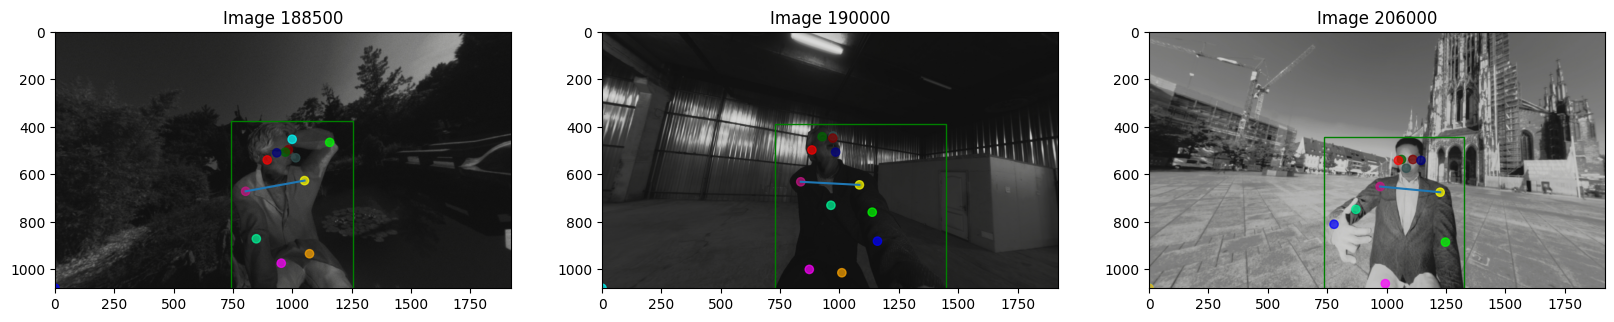

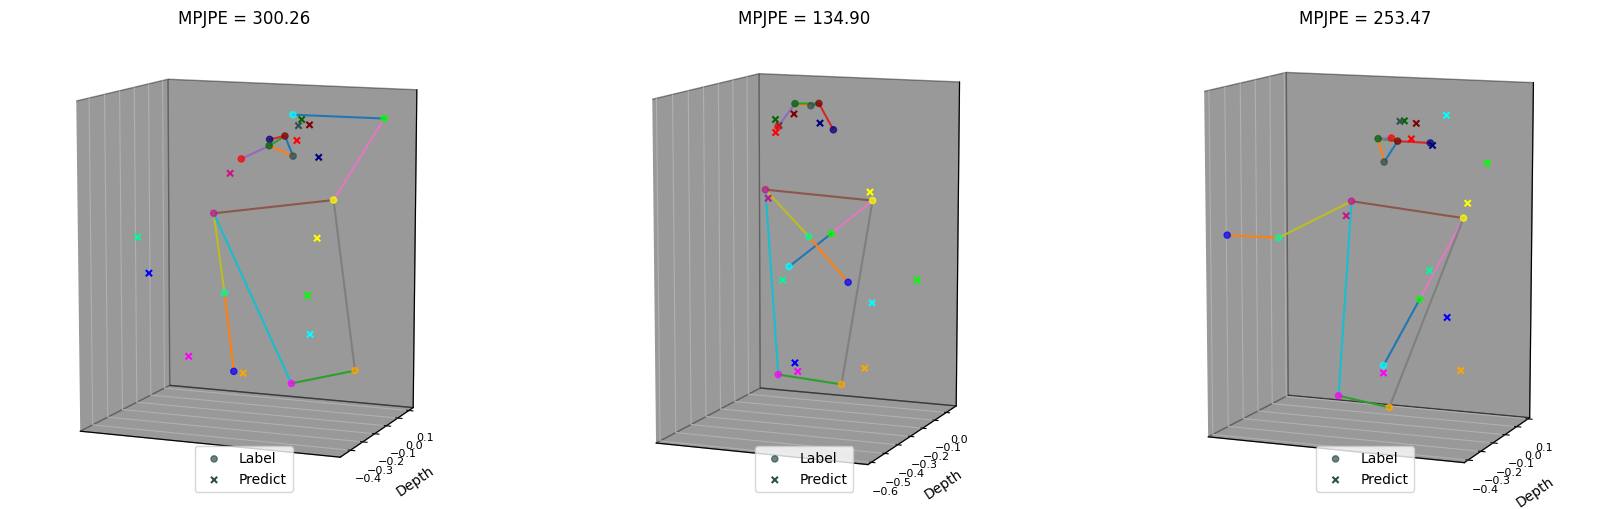

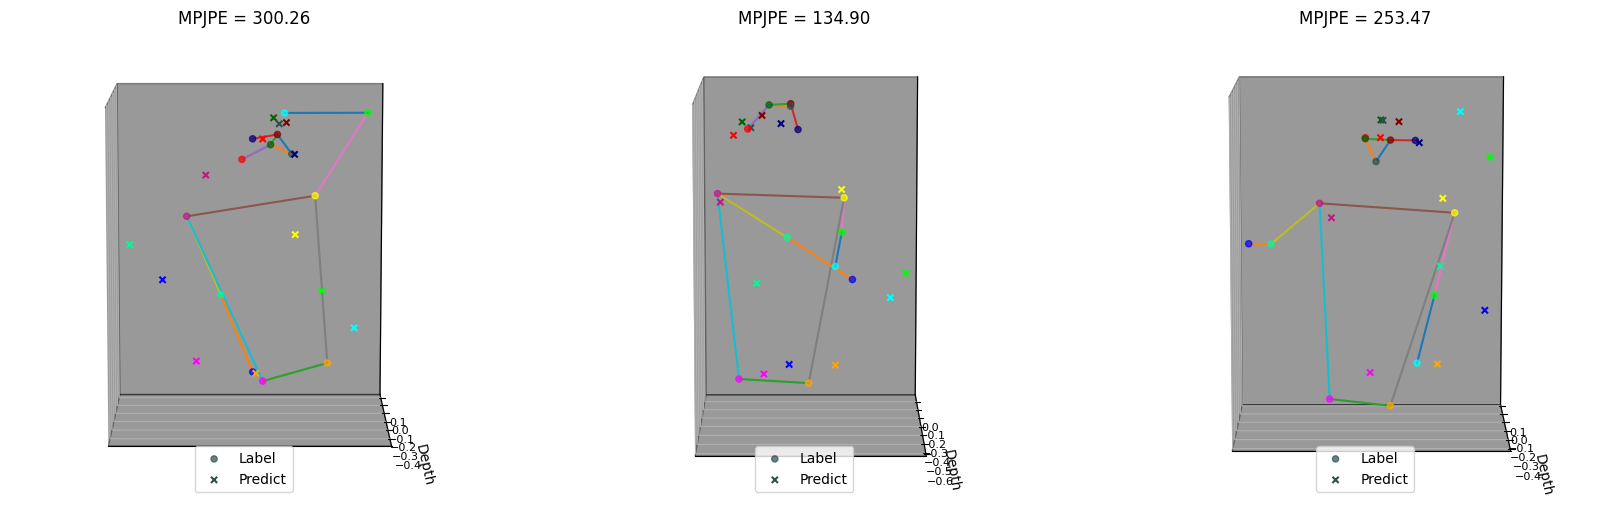

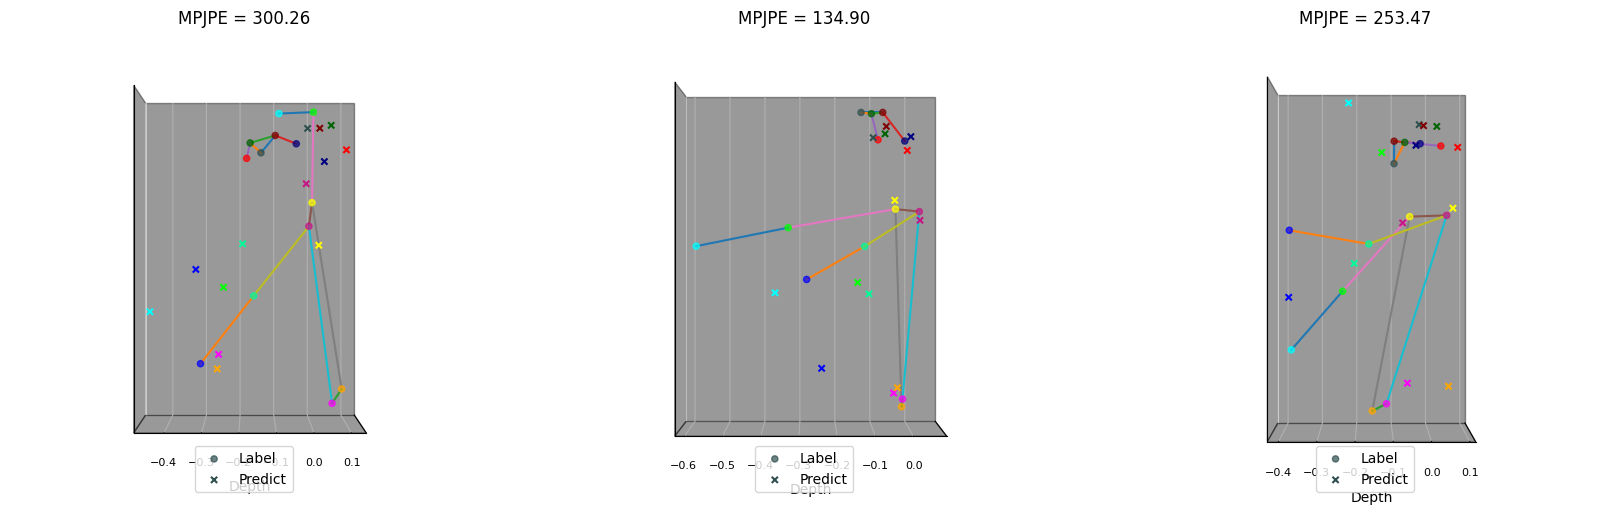

In [40]:
from modules.utils.visualization import (
    plot_samples
)
from pathlib import Path
plot_samples(
    Path('/root/synthetic_cabin_1m/syntheticcabin_1mil/SyntheticCabin_1m/'),
    lit_model.to('cpu'),
    test_loader,
    None,
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_indices=[1000, 2500, 6000],
    is_plot_gt_skeleton=True
)